# BOSTON HOUSE PRICE DATASET-------LINEAR REGRESSION

   ### - First checkout what is the dataset and then inside the dataset checkout what is the 'y' output and if the 'y' output is in continuous data (decimal value ) Label/traget, there we will use LINEAR REGRESSION.

In [99]:
#import the libraries 

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning libraries 
import sklearn
from sklearn.linear_model import LinearRegression

#import metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

#for training and testing the dataset
from sklearn.model_selection import train_test_split


#import warning
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.datasets import load_boston

In [6]:
boston = load_boston()  # automatically convert it into dictionary format with keys and values 
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [7]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [11]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [15]:
boston.target   # y output predicting house price 

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [16]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [17]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [20]:
bos =  pd.DataFrame(boston.data , columns=boston.feature_names) # using boston data amking a dataframe with all the 13'x'inputs.

In [21]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


# EDA

In [22]:
bos.shape  # to check the dimension of the dataset

(506, 13)

In [23]:
bos['target'] = boston.target  # Adding and loading 'y' output (houseprice) in the df

In [24]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [25]:
bos   # target/label is added in this df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [26]:
bos.shape

(506, 14)

In [27]:
bos.dtypes   # to check the datatype

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object

In [28]:
bos.isnull().sum()   # to check any missing value 

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

<AxesSubplot:>

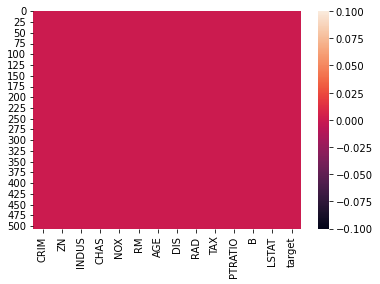

In [29]:
sns.heatmap(bos.isnull())

### STATISTICAL SUMMARY 

In [30]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### KEY OBSERVATIONS -
- The total number of count in each columns is 506 , which indicates that there is no-null values present in or dataset.
- High standard deviation are present in ZN, INDUS , AGE,TAX,B. Mean data spread is too much  and range is also high.
- CRIM,INDUS,RAD has mean greater than median which means that the data in these are skewed to right.
- There is large gap between 75% and max values in CRIM,ZN,DIS,LSTAT and including TARGET which shows the presence of outliers .

### TO CHECK SKEWNESS 

In [32]:
bos.skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
target     1.108098
dtype: float64

### TO CHECK OULIERS IN INDIVIDUAL COLUMNS

<AxesSubplot:>

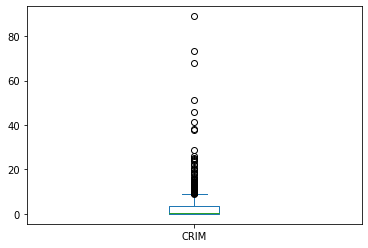

In [33]:
bos['CRIM'].plot.box()

<AxesSubplot:>

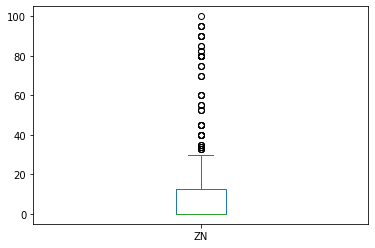

In [34]:
bos['ZN'].plot.box()

<AxesSubplot:>

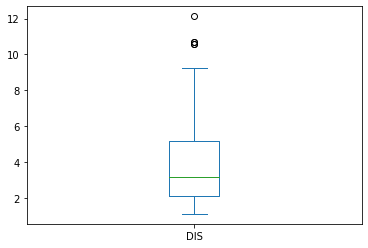

In [36]:
bos['DIS'].plot.box()

<AxesSubplot:>

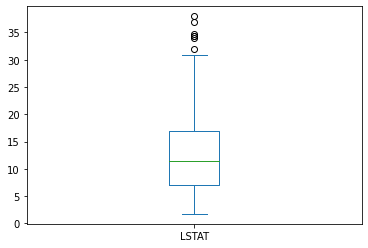

In [38]:
bos['LSTAT'].plot.box()

CRIM          AxesSubplot(0.125,0.536818;0.0945122x0.343182)
ZN         AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
INDUS      AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
CHAS       AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
NOX        AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
RM         AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
AGE        AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
DIS              AxesSubplot(0.125,0.125;0.0945122x0.343182)
RAD           AxesSubplot(0.238415,0.125;0.0945122x0.343182)
TAX           AxesSubplot(0.351829,0.125;0.0945122x0.343182)
PTRATIO       AxesSubplot(0.465244,0.125;0.0945122x0.343182)
B             AxesSubplot(0.578659,0.125;0.0945122x0.343182)
LSTAT         AxesSubplot(0.692073,0.125;0.0945122x0.343182)
target        AxesSubplot(0.805488,0.125;0.0945122x0.343182)
dtype: object

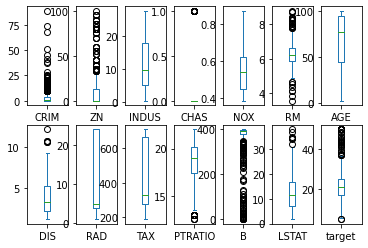

In [40]:
# checking using subplot

bos.plot(kind='box',subplots=True,layout=(2,7))

- Now , we know that in our dataset outliers are present, so we need to remove them first.

In [41]:
# checking outliers

from scipy.stats import zscore

z=np.abs(zscore(bos))
z

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.419782,0.284830,1.287909,0.272599,0.144217,0.413672,0.120013,0.140214,0.982843,0.666608,1.459000,0.441052,1.075562,0.159686
1,0.417339,0.487722,0.593381,0.272599,0.740262,0.194274,0.367166,0.557160,0.867883,0.987329,0.303094,0.441052,0.492439,0.101524
2,0.417342,0.487722,0.593381,0.272599,0.740262,1.282714,0.265812,0.557160,0.867883,0.987329,0.303094,0.396427,1.208727,1.324247
3,0.416750,0.487722,1.306878,0.272599,0.835284,1.016303,0.809889,1.077737,0.752922,1.106115,0.113032,0.416163,1.361517,1.182758
4,0.412482,0.487722,1.306878,0.272599,0.835284,1.228577,0.511180,1.077737,0.752922,1.106115,0.113032,0.441052,1.026501,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.413229,0.487722,0.115738,0.272599,0.158124,0.439316,0.018673,0.625796,0.982843,0.803212,1.176466,0.387217,0.418147,0.014454
502,0.415249,0.487722,0.115738,0.272599,0.158124,0.234548,0.288933,0.716639,0.982843,0.803212,1.176466,0.441052,0.500850,0.210362
503,0.413447,0.487722,0.115738,0.272599,0.158124,0.984960,0.797449,0.773684,0.982843,0.803212,1.176466,0.441052,0.983048,0.148802
504,0.407764,0.487722,0.115738,0.272599,0.158124,0.725672,0.736996,0.668437,0.982843,0.803212,1.176466,0.403225,0.865302,0.057989


In [42]:
# Threshold for zscore value -- above 3 are considered as Outliers 

threshold=3
print(np.where(z>3))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

In [45]:
bos.skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
target     1.108098
dtype: float64

#### Handing skewness

<AxesSubplot:ylabel='Frequency'>

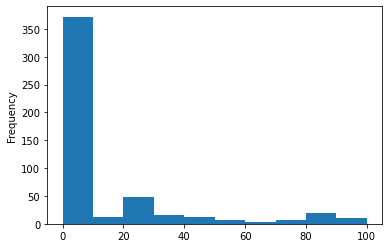

In [46]:
bos['ZN'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

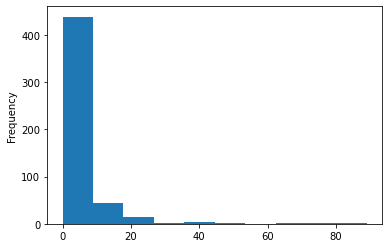

In [47]:
bos['CRIM'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

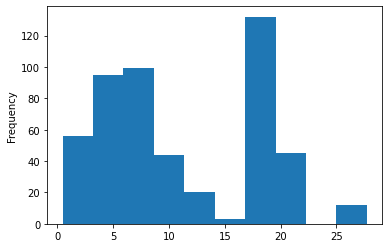

In [48]:
bos['INDUS'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

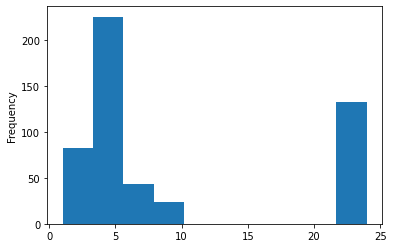

In [49]:
bos['RAD'].plot.hist()

#### TO TREAT THE SKEWNESS USING 2 METHODS 
- 1) LOG TRANSFORMATION METHOD
- 2) BOXCOX METHOD 

- In Numpy , there is log transformation method  and another way is in scipy.stats which boxcox method .

<AxesSubplot:ylabel='Frequency'>

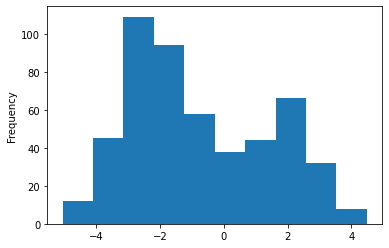

In [51]:
#Log transformation method 

bos['CRIM'] = np.log(bos['CRIM'])
bos['CRIM'].plot.hist()

In [52]:
from scipy.stats import boxcox

<AxesSubplot:ylabel='Frequency'>

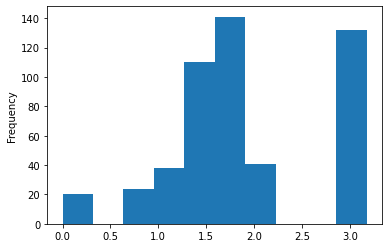

In [56]:
bos['RAD']=boxcox(bos['RAD'],0)
bos['RAD'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

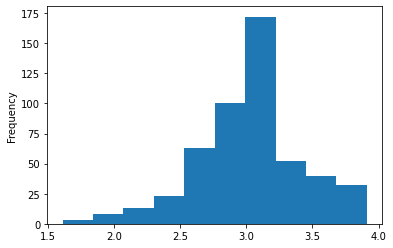

In [59]:
bos['target']=boxcox(bos['target'],0)
bos['target'].plot.hist()

In [60]:
bos.skew()

CRIM       0.405934
ZN         2.225666
INDUS     -0.643126
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        0.286617
TAX        0.330557
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
target    -0.330321
dtype: float64

#### BI VARIATE ANALYSIS

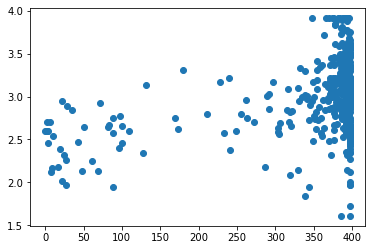

In [61]:
plt.scatter(bos['B'],bos['target'])
plt.show()

- When 'B' value increases , then the houseprice'target' became saturated.

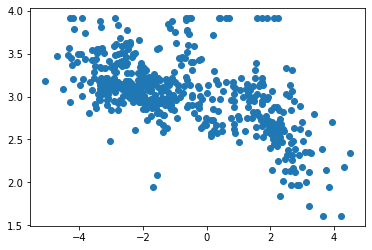

In [62]:
plt.scatter(bos['CRIM'],bos['target'])
plt.show()

- when'CRIM' crime rate increases the houseprice rate decreases.

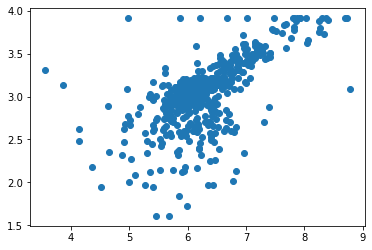

In [63]:
x = bos['RM']
y = bos['target']
plt.scatter(x,y)
plt.show()

- when rrom numbers are increased , simultaneously 'Target' also increases.

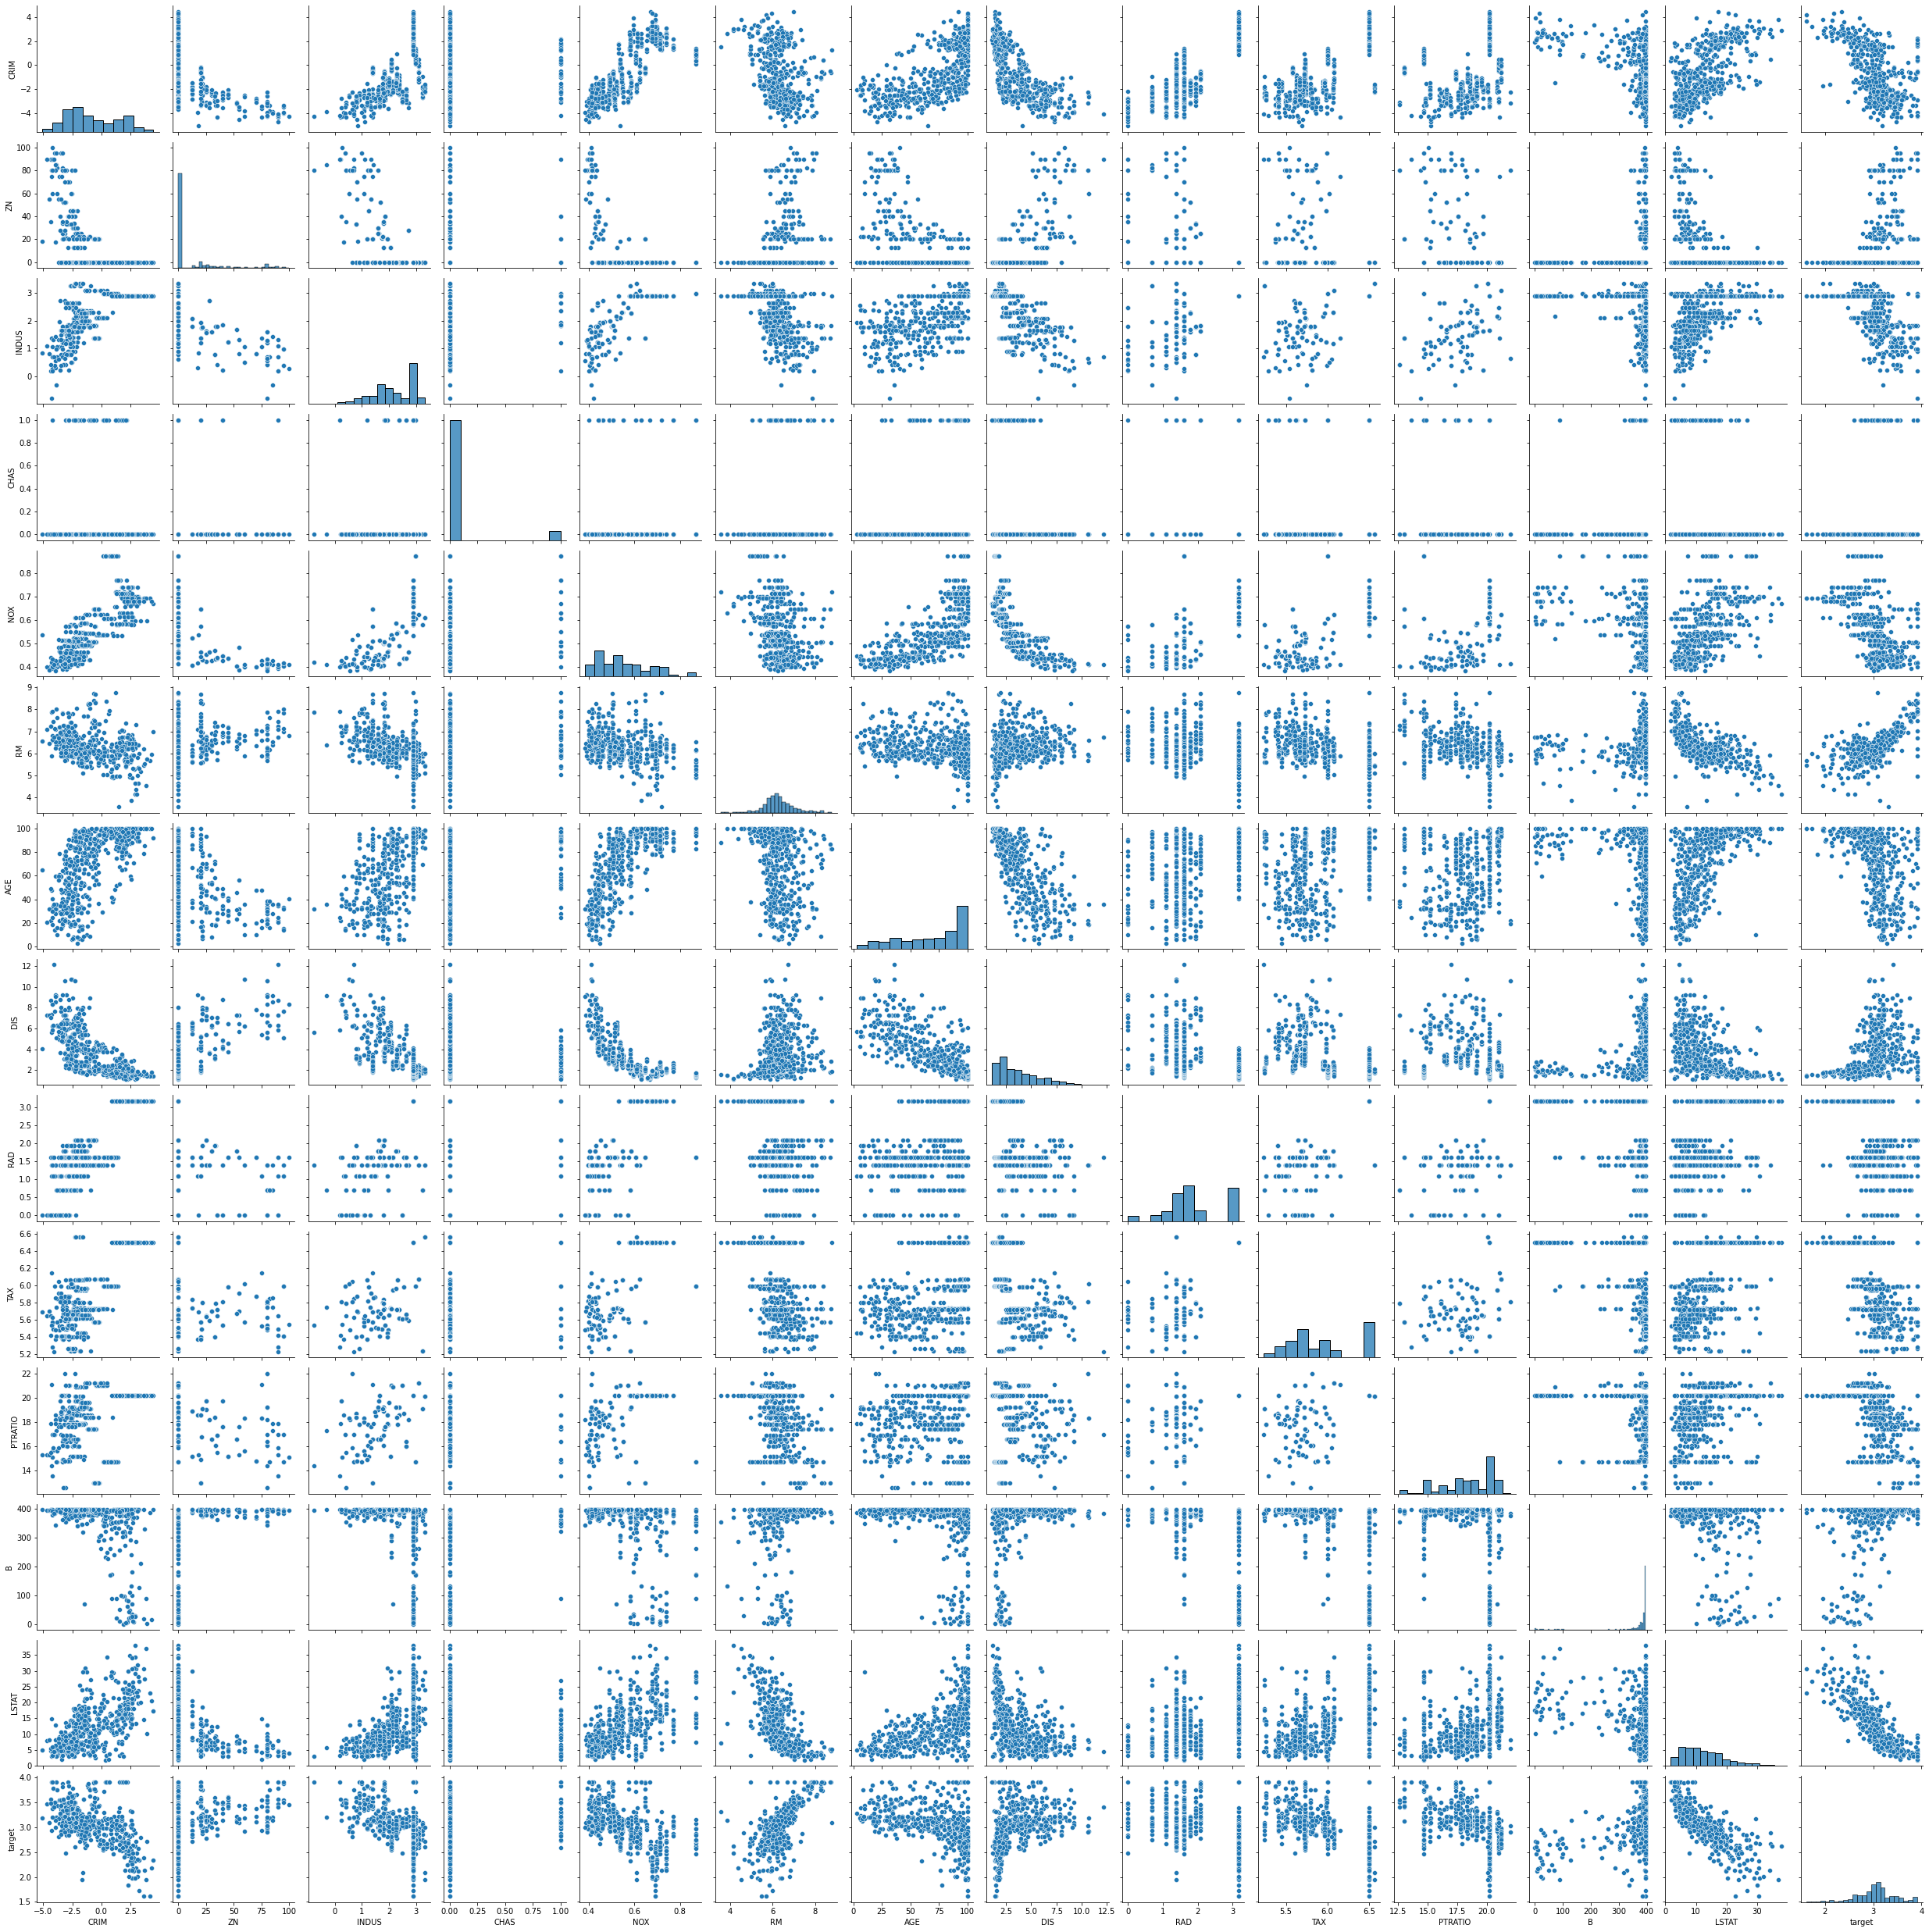

In [64]:
sns.pairplot(bos)

#### CORRELATION MATRIX

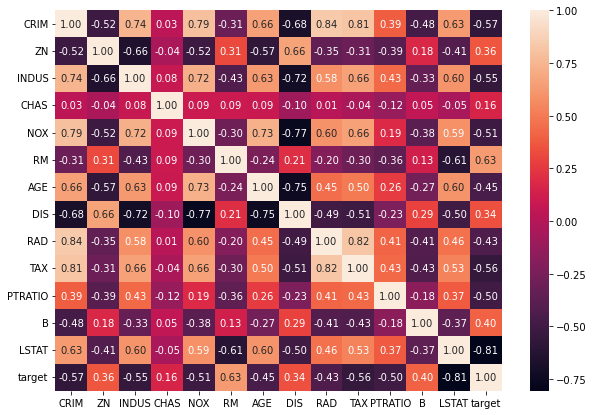

In [70]:
boscor = bos.corr()

plt.figure(figsize=(10,7))
sns.heatmap(boscor,annot=True,fmt='.2f')
plt.show()

#### check the lighter color combination which means they are highly related to each other.
examples -
- 'RAD' and 'TAX' are highly correlated to each other.
- 'TAX' and 'PTRATIO' are somewhat correlated to each other.
- 'AGE' and 'DIS are negatively correalted to each other.
- 'LSTAT' is negatively related with 'target'

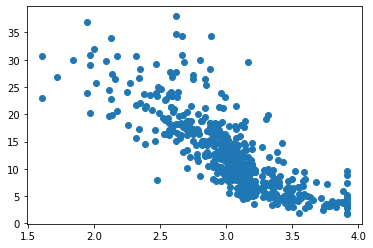

In [71]:
plt.scatter(bos['target'],bos['LSTAT'])   # negative realtion 
plt.show()

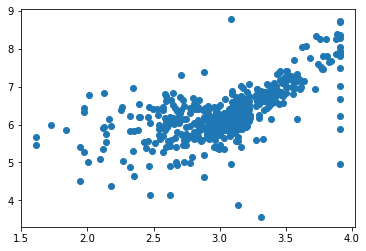

In [72]:
plt.scatter(bos['target'],bos['RM'])   # Positive realtion 
plt.show()

- so , we can drop the 'LSTAT' as it is negatively coorelated with the target.

In [74]:
bos.drop('LSTAT',inplace= True,axis=1)

In [75]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,target
0,-5.064036,18.0,0.837248,0.0,0.538,6.575,65.2,4.0900,0.000000,5.690359,15.3,396.90,3.178054
1,-3.600502,0.0,1.955860,0.0,0.469,6.421,78.9,4.9671,0.693147,5.488938,17.8,396.90,3.072693
2,-3.601235,0.0,1.955860,0.0,0.469,7.185,61.1,4.9671,0.693147,5.488938,17.8,392.83,3.546740
3,-3.430523,0.0,0.779325,0.0,0.458,6.998,45.8,6.0622,1.098612,5.402677,18.7,394.63,3.508556
4,-2.672924,0.0,0.779325,0.0,0.458,7.147,54.2,6.0622,1.098612,5.402677,18.7,396.90,3.589059


#### Removing outliers 

In [76]:
bos_new=bos[(z<3).all(axis=1)]  # all the data less than 3

In [77]:
bos.shape  # previous dataset

(506, 13)

In [78]:
bos_new.shape   # new dataset 

(415, 13)

In [79]:
bos = bos_new
bos.shape

(415, 13)

In [80]:
x = bos.iloc[:,0:-1]   # : means all the rows
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B
0,-5.064036,18.0,0.837248,0.0,0.538,6.575,65.2,4.0900,0.000000,5.690359,15.3,396.90
1,-3.600502,0.0,1.955860,0.0,0.469,6.421,78.9,4.9671,0.693147,5.488938,17.8,396.90
2,-3.601235,0.0,1.955860,0.0,0.469,7.185,61.1,4.9671,0.693147,5.488938,17.8,392.83
3,-3.430523,0.0,0.779325,0.0,0.458,6.998,45.8,6.0622,1.098612,5.402677,18.7,394.63
4,-2.672924,0.0,0.779325,0.0,0.458,7.147,54.2,6.0622,1.098612,5.402677,18.7,396.90


- Using iloc take all the rows which is  from starting 0 till -1 where -1  will be excluded.

In [81]:
y = bos.iloc[:,-1]   # given me all the rows: of -1 only
y.head()

0    3.178054
1    3.072693
2    3.546740
3    3.508556
4    3.589059
Name: target, dtype: float64

In [82]:
x.shape

(415, 12)

In [83]:
y.shape

(415,)

#### SPLIT DATA USING TRAIN TEST SPLIT

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [86]:
x_train.shape

(290, 12)

In [87]:
x_test.shape

(125, 12)

In [88]:
y_train.shape

(290,)

In [89]:
y_test.shape

(125,)

#### MODEL BUILDING

In [90]:
lm=LinearRegression()

In [91]:
lm.fit(x_train,y_train)   # sending train data


LinearRegression()

In [92]:
lm.coef_   # coefficient value/slope value 

array([-1.39205612e-02, -1.53304332e-03, -1.27885622e-02,  3.14331894e-15,
       -4.85878186e-01,  3.14712817e-01, -2.72869345e-03, -3.24178763e-02,
        4.99643387e-02, -2.10587462e-01, -3.73698791e-02,  4.22049182e-04])

In [93]:
lm.intercept_   # a value 

3.3512189955104965

In [94]:
lm.score(x_train,y_train)   # means 71.6 % ML model is woring well with linear regression. it depend on the data provided .

0.7162598520736569

In [96]:
# testing the data (predicted data)

pred=lm.predict(x_test)
print("Predicted result price:",pred)
print("Actual price :",y_test)

Predicted result price: [3.04176897 2.66767716 3.40684993 2.96089074 2.58481897 3.07741715
 2.76157413 3.08893257 3.33207011 2.51761315 2.81867585 2.70784706
 2.47426309 3.13164559 3.32007511 2.49609609 3.23201402 3.28152157
 3.22885773 2.67256018 3.00981291 2.98404925 3.13120305 2.5621204
 3.05815778 3.07781796 3.39542551 3.31216215 2.96569411 3.20858464
 3.41267386 2.69575463 2.61731191 3.22621996 2.73174656 2.70312821
 3.29267889 3.12734847 2.73285039 2.90879807 2.75391211 2.8509861
 3.03101526 3.27817944 2.80060013 3.16812136 2.87905511 2.88084307
 2.87724671 3.0850594  3.03162949 2.8272541  3.7154808  2.65579276
 2.8491369  3.04513748 2.91570928 3.78946169 2.9282481  2.87587051
 3.27389251 2.81248328 3.19149765 3.27893185 2.62998176 2.27555306
 3.57442969 2.86753221 2.85992101 3.10234495 3.53627522 2.99306184
 3.17056588 3.18372759 2.83511033 3.05890599 2.7768866  2.83227202
 3.05675756 2.69478645 2.79899171 3.04916863 3.23439802 3.272244
 2.78332433 3.28427061 2.95583273 3.219185

In [98]:
print('error:')
print('Mean absolute error :',mean_absolute_error(y_test,pred))
print('Mean squared error :',mean_squared_error(y_test,pred))

print('Root mean square error :',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error : 0.12084544193339358
Mean squared error : 0.04673181971486895
Root mean square error : 0.21617543735325007


- Apart from this there is one more method called r2 score where we check the model performance .

### r2 score ----> coefficient of determination 

### - r2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable s.
 so whenever the x input varibale is changed the y output is also changed .
 (changes coming in 'y' when 'x' is changed )

In [100]:
# so hence we need to import r2 score lib.

print(r2_score(y_test,pred))   # means 60% changes are coming in y when x is changed 

0.6018944896913675


### predict the house price by providing certain input values random values 


In [101]:
t=np.array([0.006,18.09,2.345,0.09,0.456,78.3,15.47,098.3,99.2,46.48,87.3,56.1])   # 12 input values x values 

In [102]:
t.shape   # this shows 12 rows , we need to reshape it into 12 columns .

(12,)

In [104]:
t=t.reshape(1,-1)   # 1 row,-1 means many columns 
t.shape

(1, 12)

In [105]:
lm.predict(t)

array([16.41462019])

#### if we want to save the predicted value 

In [106]:
df = pd.DataFrame(pred)
df.to_csv('House price prediction.csv')

#### ******completed*****